# Amazon Reviews Sentiment Analysis -- EDA part

This notebook contains code that doing the basic EDA part, and some explanation of our dataset.

In [3]:
# Import packages we need
import json
import os
import pandas as pd
import numpy as np
from datetime import datetime, timedelta 
import matplotlib.pyplot as plt

## Read Data

In [4]:
def readJson(filePath):
    """ Read data from json file based on given filePath """
    with open(filePath) as data: 
        data = json.load(data)
        data = pd.DataFrame(data)
        
        # Convert the string time back to datetime
        data["reviewTime"] = pd.to_datetime(data.reviewTime)
        return data

In [5]:
# Example, All Beauty department
department = "All_Beauty"
folder_name = "../data"
data = readJson(folder_name + "/" + department + ".json")

In [6]:
data.head()

,overall,verified,reviewTime,reviewerID,productID,reviewText,summary,image,department
0,5.0,True,2016-09-01,A3CIUOJXQ5VDQ2,B0000530HU,As advertised. Reasonably priced,Five Stars,False,All_Beauty
1,5.0,False,2018-05-07,A2G90R2ZU6KU5D,B00006L9LC,Got this shampoo as a solution for my wife's d...,"Outstanding, no complains",False,All_Beauty
2,2.0,True,2018-05-07,A24W4W9E62FZP2,B00006L9LC,No change my scalp still itches like crazy. It...,No change my scalp still itches like crazy. It...,False,All_Beauty
3,1.0,True,2018-05-06,A7ID5H7FWLJHC,B00006L9LC,Too expensive for such poor quality. There was...,Too expensive for such poor quality. There was...,False,All_Beauty
4,1.0,True,2018-05-06,AYKOSAJTP5AVS,B00006L9LC,"It dries my hair, doesnt help to reduce dandru...","Dries my hair, doesnt help to reduce dandruff....",False,All_Beauty


In [5]:
def count_rating(data):
    """ Count rating in given dataframe """
    count_dictionary = {}
    for score in [1.0, 2.0, 3.0, 4.0, 5.0]:
        x_star = str(int(score)) + "-star"
        count_dictionary[x_star] = data[data["overall"] == score].shape[0]
    return count_dictionary

### Count reivews by department


In [8]:
# All processed data is stored in 'data' folder
# Store all variables that will be used in plotting

folder_name = "../data"
i = 0
count_dictionary = {}
for file_name in os.listdir(folder_name):
    if "json" != file_name[-4:]:
        continue
    data = readJson(folder_name + "/" + file_name)
    
    # ==========================================
    # Count: number of records(reviews)
    # Product: number of products
    # x_star: x in [1, 2, 3, 4, 5], scores 
    # Verified: number of verified purchase
    # Image: number of uploading customer images
    # ==========================================
    count_dictionary[i] = {"Department": file_name[:-5], 
                           "Count": data.shape[0], 
                           "Product": data.productID.unique().shape[0]}
    for score in [1.0, 2.0, 3.0, 4.0, 5.0]:
        x_star = str(int(score)) + "-star"
        count_dictionary[i][x_star] = data[data["overall"] == score].shape[0]
    count_dictionary[i]["Verified"] = data[data["verified"] == True].shape[0]
    count_dictionary[i]["Image"] = data[data["image"] == True].shape[0]
    i += 1

In [9]:
count_data = pd.DataFrame.from_dict(count_dictionary, orient="index")
count_data["Review_Rate"] = count_data.Count / count_data.Product
count_data["Verified_Rate"] = count_data.Verified/count_data.Count
count_data["Image_Rate"] = count_data.Image/count_data.Count

In [14]:
# Example review text
data.reviewText.iloc[0]

'As advertised. Reasonably priced'

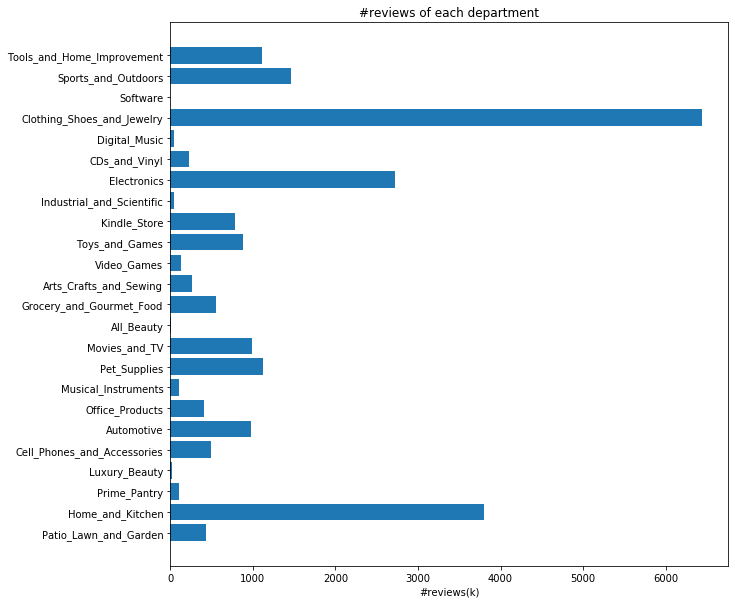

In [6]:
# Plot the number of reviews for each department
plt.figure(figsize=(10, 10))
plt.barh(list(range(count_data.shape[0])) ,count_data.Count / 1000)
plt.yticks(list(range(count_data.shape[0])), count_data.Department)
plt.title("#reviews of each department")
plt.xlabel("#reviews(k)")
plt.show()

In [7]:
print("Minimum:", min(count_data.Count), ", Maximum:", max(count_data.Count))

Minimum: 1906 , Maximum: 6436926


**Clothing_Shoes_and_jewelry** has the MOST reviews, which is over 6 million. **Software** has the LESS reviews, which is 1906.

### Count products by department

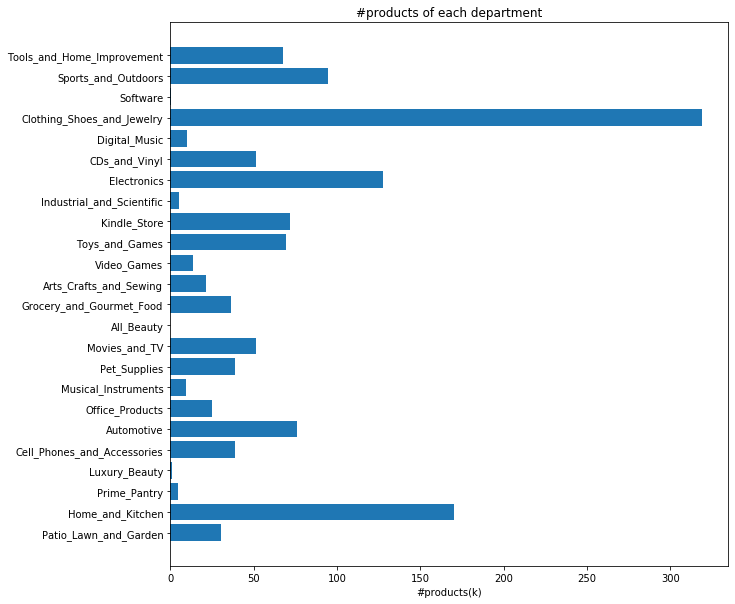

In [8]:
plt.figure(figsize=(10, 10))
plt.barh(list(range(count_data.shape[0])) ,count_data.Product / 1000)
plt.yticks(list(range(count_data.shape[0])), count_data.Department)
plt.title("#products of each department")
plt.xlabel("#products(k)")
plt.show()

The result is similar to #reviews result, **Clothing_Shoes_and_jewelry** has the MOST products, thus it also has the MOST reviews.

### Count average reviews by department

Here average reviews is calculated by #reviews/#products

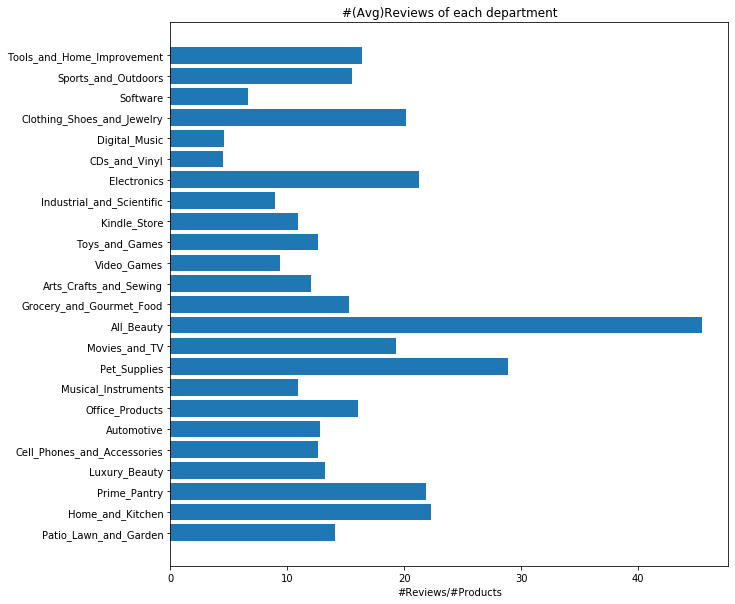

In [9]:
plt.figure(figsize=(10, 10))
plt.barh(list(range(count_data.shape[0])) ,count_data.Review_Rate)
plt.yticks(list(range(count_data.shape[0])), count_data.Department)
plt.title("#(Avg)Reviews of each department")
plt.xlabel("#Reviews/#Products")
plt.show()

It seems like that customer who bought **All_Beauty** products are more likely to give reviews, but for those who bought ** CDs_and_Vinyl** products are less likely to give reviews.

### Rating distribution by department
Here the rating distribution is represented as percentage of overall number of reviews

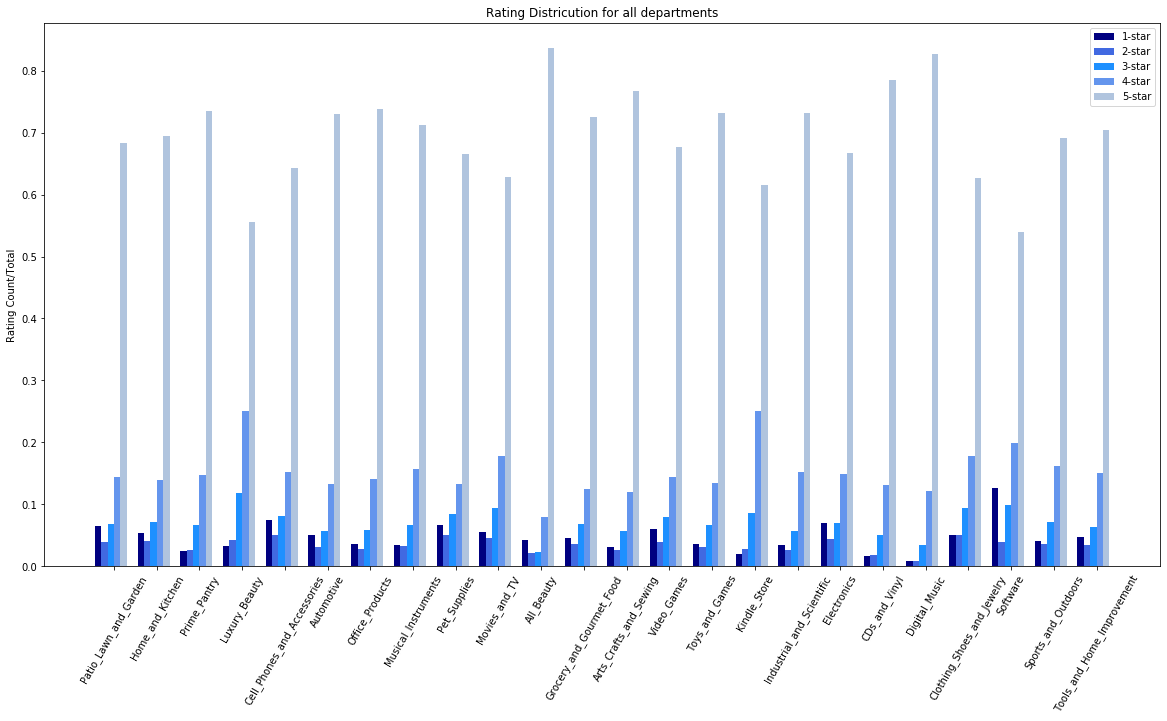

In [10]:
# X labels, deparment list
department_list = count_data.Department.tolist()

# Color labels
color_list = ["#B0C4DE", "#6495ED", "#1E90FF", "#4169E1", "#000080"][::-1]

bar_loc = np.array(range(0, len(department_list) * 2, 2))
total_width, n = 1.5, 5
width = total_width / n
tick_loc = bar_loc + width * (n / 2)

plt.figure(figsize=(20, 10))
for i, x_star in enumerate(["1-star", "2-star", "3-star", "4-star", "5-star"]):
    plt.bar(bar_loc, count_data[x_star] / count_data["Count"], width=width, label=x_star, color=color_list[i])
    bar_loc = bar_loc + width
plt.legend()
plt.xticks(tick_loc, department_list, rotation='60')
plt.ylabel("Rating Count/Total")
plt.title("Rating Districution for all departments")
plt.show()

First of all, most reviews are 5-star, **Software** department has a very high 1-star rate

# Question: Are those reviews left by TRUE customers?

We think about if we can use our current data to solve this problem. Two features in our dataset that might relate to this problem is **verified purchase** and **customer images**. The reason is that if the review is a verified purchase record, it's less likely to be a FALSE customers, similarily, if the review contains a customer image, it's also more likely to be a TRUE customer.

### Verified Purchase rate


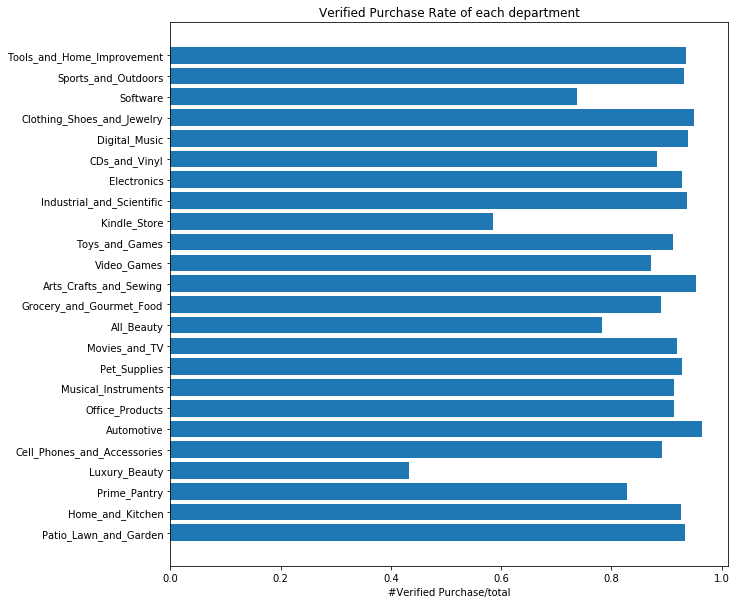

In [11]:
plt.figure(figsize=(10, 10))
plt.barh(list(range(count_data.shape[0])) ,count_data.Verified_Rate)
plt.yticks(list(range(count_data.shape[0])), count_data.Department)
plt.title("Verified Purchase Rate of each department")
plt.xlabel("#Verified Purchase/total")
plt.show()

**Automotive** and **Arts_Crafts_and_Sewing** department have the highest verified purchase rate, however, **Luxury_Beauty** has the lowest verified purchase rate, less than 50%

### Rating by Verified Purchase

In [30]:
# Read the data again and found out the rating percentage if the purchase is verified or not
folder_name = "../data"
verified_rating_dictionary = {}
for file_name in os.listdir(folder_name):
    if "json" != file_name[-4:]:
        continue
    data = readJson(file_name)
    
    # verified_dict = {"verified": {}, "not_verified": {}}
    verified_dict = {}
    
    for verified in [True, False]:
        verified_data = data[data["verified"] == verified]
        
        # score_dict = {"1-star":, "2-star":, ...}
        score_dict = {}
        for score in [1.0, 2.0, 3.0, 4.0, 5.0]:
            x_star = str(int(score)) + "-star"
            score_dict[x_star] = verified_data[verified_data["overall"] == score].shape[0] / verified_data.shape[0]
        verified_dict[verified] = score_dict
        
    verified_rating_dictionary[file_name[:-5]] = verified_dict

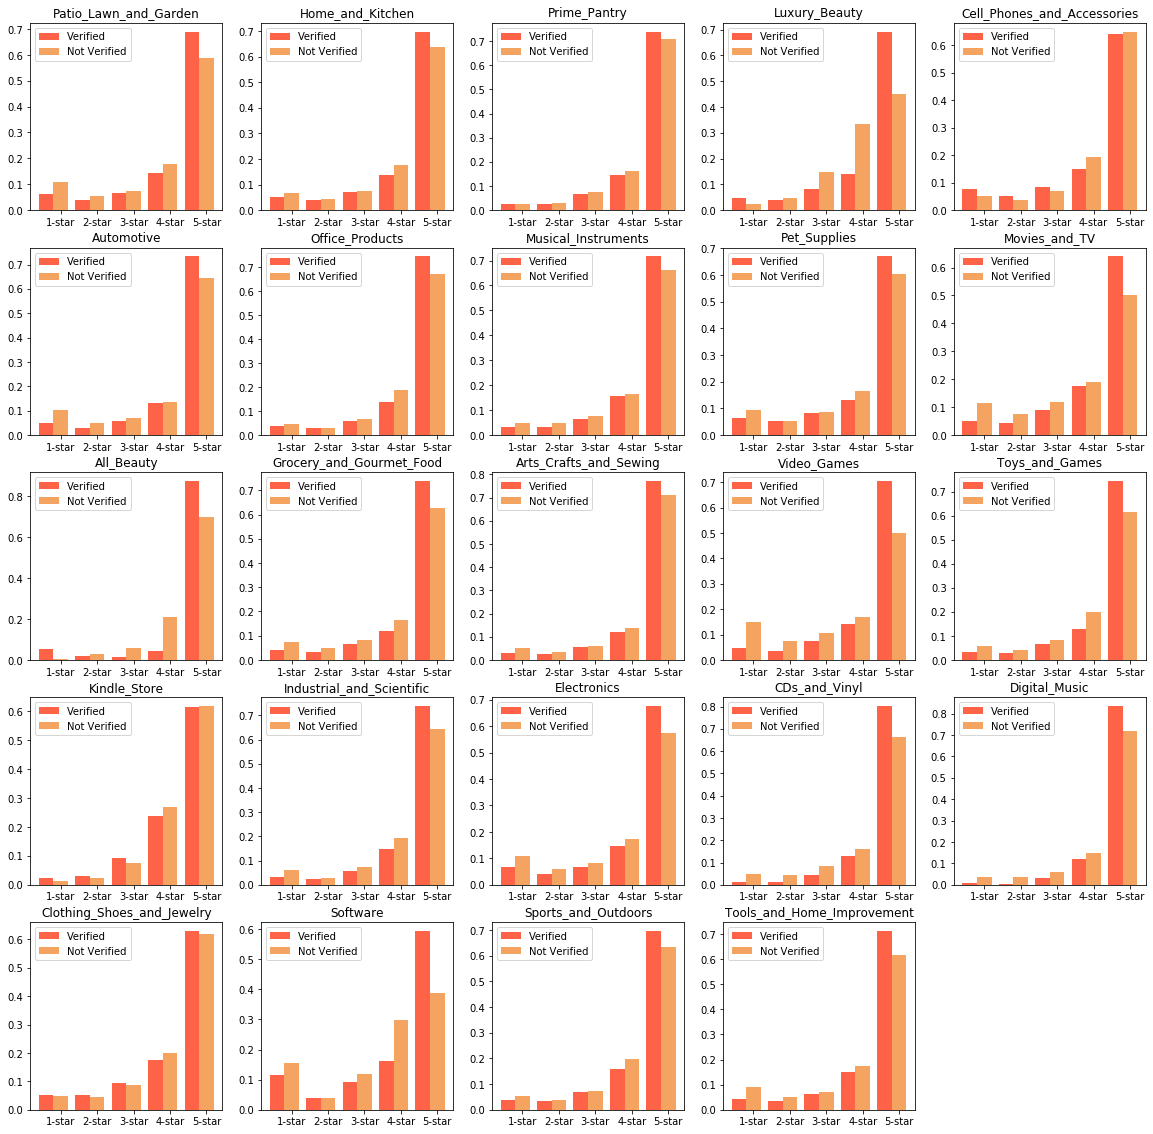

In [31]:
# X labels, score list
score_list = ["1-star", "2-star", "3-star", "4-star", "5-star"]

# Color labels
color_list = ["#FF6347", "#F4A460"]

plt.figure(figsize=(20, 20))
for i, department in enumerate(verified_rating_dictionary.keys()):

    test_data = verified_rating_dictionary[department]
    bar_loc = np.array(range(len(score_list)))
    total_width, n = 0.8, 2
    width = total_width / n
    tick_loc = bar_loc + width * (n / 2)
    
    plt.subplot(5, 5, i + 1)
    for i, verified in enumerate([(True, "Verified"), (False, "Not Verified")]):
        plt.bar(bar_loc, np.array(list(test_data[verified[0]].values())), width=width, label=verified[1], color=color_list[i])
        bar_loc = bar_loc + width
    plt.legend()
    plt.xticks(tick_loc, score_list)
    plt.title(department)

For the **Luxury_Beauty** department, from last plot we can see that they have a half un-verified purchase, and those un-verified purchase reviews tend to give a higher score comparing with verified purchase reviews.

### Customer Image percentage by department

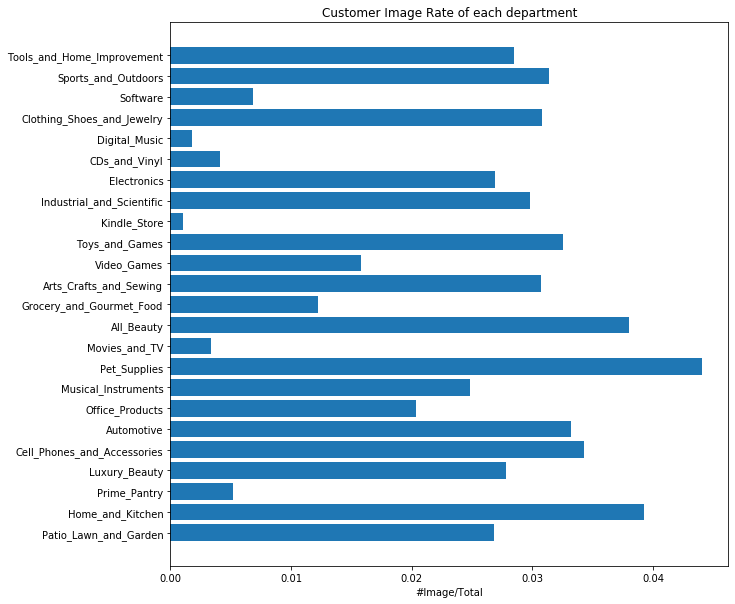

In [14]:
plt.figure(figsize=(10, 10))
plt.barh(list(range(count_data.shape[0])) ,count_data.Image_Rate)
plt.yticks(list(range(count_data.shape[0])), count_data.Department)
plt.title("Customer Image Rate of each department")
plt.xlabel("#Image/Total")
plt.show()

**Pet_Supplies** has the highest customer images rate, the pet lovers might prefer to show the images of their lovely pets.

In [32]:
# Read the data again and found out the rating distribution if the reviews has customer images or not
folder_name = "../data"
customerImage_rating_dictionary = {}
for file_name in os.listdir(folder_name):
    if "json" != file_name[-4:]:
        continue
    data = readJson(file_name)
    
    customerImage_dict = {}
    
    for hasImage in [True, False]:
        customerImage_data = data[data["image"] == hasImage]
        
        # score_dict = {"1-star":, "2-star":, ...}
        score_dict = {}
        for score in [1.0, 2.0, 3.0, 4.0, 5.0]:
            x_star = str(int(score)) + "-star"
            score_dict[x_star] = customerImage_data[customerImage_data["overall"] == score].shape[0] / customerImage_data.shape[0]
        customerImage_dict[hasImage] = score_dict
        
    customerImage_rating_dictionary[file_name[:-5]] = customerImage_dict

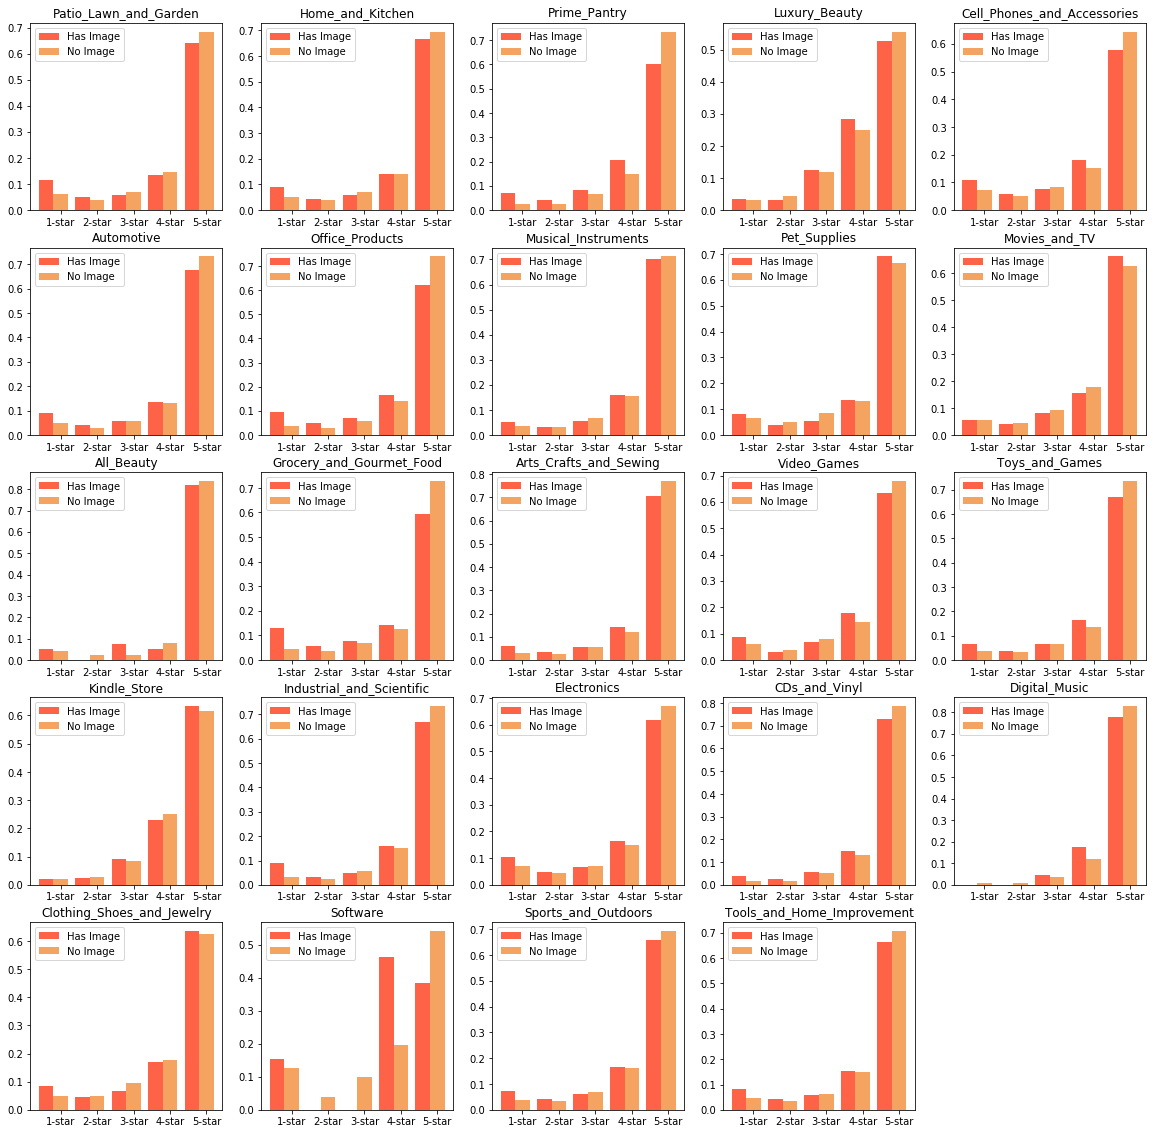

In [33]:
# X labels, score list
score_list = ["1-star", "2-star", "3-star", "4-star", "5-star"]

# Color labels
color_list = ["#FF6347", "#F4A460"]

plt.figure(figsize=(20, 20))
for i, department in enumerate(customerImage_rating_dictionary.keys()):

    test_data = customerImage_rating_dictionary[department]
    bar_loc = np.array(range(len(score_list)))
    total_width, n = 0.8, 2
    width = total_width / n
    tick_loc = bar_loc + width * (n / 2)
    
    plt.subplot(5, 5, i + 1)
    for i, hasImage in enumerate([(True, "Has Image"), (False, "No Image")]):
        plt.bar(bar_loc, np.array(list(test_data[hasImage[0]].values())), width=width, label=hasImage[1], color=color_list[i])
        bar_loc = bar_loc + width
    plt.legend()
    plt.xticks(tick_loc, score_list)
    plt.title(department)

From the above plots, we see that all departments have a very high unverified purchase rate and a very low customer image rate. Also, we suppose that those reviews from FALSE customer will be more likely to be higher rating, e.g. 5-star, so we also plot the rating distribution of verified/un-verified purchase rate, and customer image/no customer image, we can see that the rating distribution is very similar, so we cannot find the difference in rating distribution among these two features. Therefore, we conclude that it's hard to verify the TURE customers from our current data.

## Consider Time
Another aspect that we are interested about is how does the reviews data change along the time, are customers more likely to write reviews than before or not?  Therefore, we also plot the features for each month from 2016 to 2018

### Average #reviews by time

In [15]:
# Read the data again and found out the rating distribution if the purchase is verified or not
folder_name = "../data"
time_count_dictionary = {}
for file_name in os.listdir(folder_name):
    if "json" != file_name[-4:]:
        continue
    data = readJson(file_name)
    
    # Retrieve number of reviews, number of products in 2016, 2017, 2018
    date_range = pd.date_range(start="2015-12-31", end=data.reviewTime.max(), freq='M')
    count_list, product_list = [], []
    for start, end in zip(date_range[:-1], date_range[1:]):
        select_data = data[(data.reviewTime >= start) & (data.reviewTime < end)]
        count_list.append(select_data.shape[0])
        product_list.append(select_data.productID.unique().shape[0])
    time_count_dictionary[file_name[:-5]] = {"Count": count_list, "Product": product_list, "Date": date_range[1:]}

In [16]:
pd.DataFrame.from_dict(time_count_dictionary, orient="index")

,Count,Product,Date
Patio_Lawn_and_Garden,"[11370, 10449, 12993, 14756, 20763, 23876, 244...","[6484, 6140, 7206, 7967, 9871, 10794, 10936, 1...","DatetimeIndex(['2016-01-31', '2016-02-29', '20..."
Home_and_Kitchen,"[165341, 151069, 152591, 129881, 137682, 14186...","[56845, 54669, 55287, 51028, 53223, 54363, 560...","DatetimeIndex(['2016-01-31', '2016-02-29', '20..."
Prime_Pantry,"[3138, 3647, 3970, 3852, 3938, 3843, 5046, 489...","[1504, 1692, 1790, 1806, 1829, 1820, 2160, 215...","DatetimeIndex(['2016-01-31', '2016-02-29', '20..."
Luxury_Beauty,"[461, 544, 802, 564, 480, 684, 1089, 649, 786,...","[186, 217, 208, 180, 207, 199, 213, 214, 210, ...","DatetimeIndex(['2016-01-31', '2016-02-29', '20..."
Cell_Phones_and_Accessories,"[29603, 25986, 29362, 28544, 27841, 29056, 286...","[12539, 11750, 12375, 12116, 12344, 12794, 127...","DatetimeIndex(['2016-01-31', '2016-02-29', '20..."
Automotive,"[31637, 31520, 37773, 35000, 36651, 37099, 380...","[17688, 18029, 20587, 19657, 20521, 20485, 209...","DatetimeIndex(['2016-01-31', '2016-02-29', '20..."
Office_Products,"[18060, 18191, 18571, 16291, 16609, 15818, 168...","[7497, 7672, 7685, 7072, 7431, 7478, 7628, 783...","DatetimeIndex(['2016-01-31', '2016-02-29', '20..."
Musical_Instruments,"[4688, 4493, 5299, 4054, 4307, 3986, 4104, 407...","[2493, 2455, 2672, 2300, 2373, 2294, 2313, 231...","DatetimeIndex(['2016-01-31', '2016-02-29', '20..."
Pet_Supplies,"[44389, 43063, 45649, 40294, 43183, 44155, 464...","[13652, 13708, 14196, 13618, 14070, 14606, 149...","DatetimeIndex(['2016-01-31', '2016-02-29', '20..."
Movies_and_TV,"[48748, 61386, 59346, 42198, 59994, 61785, 528...","[15204, 15887, 16343, 13713, 15430, 15178, 145...","DatetimeIndex(['2016-01-31', '2016-02-29', '20..."


/Users/macbookpro/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


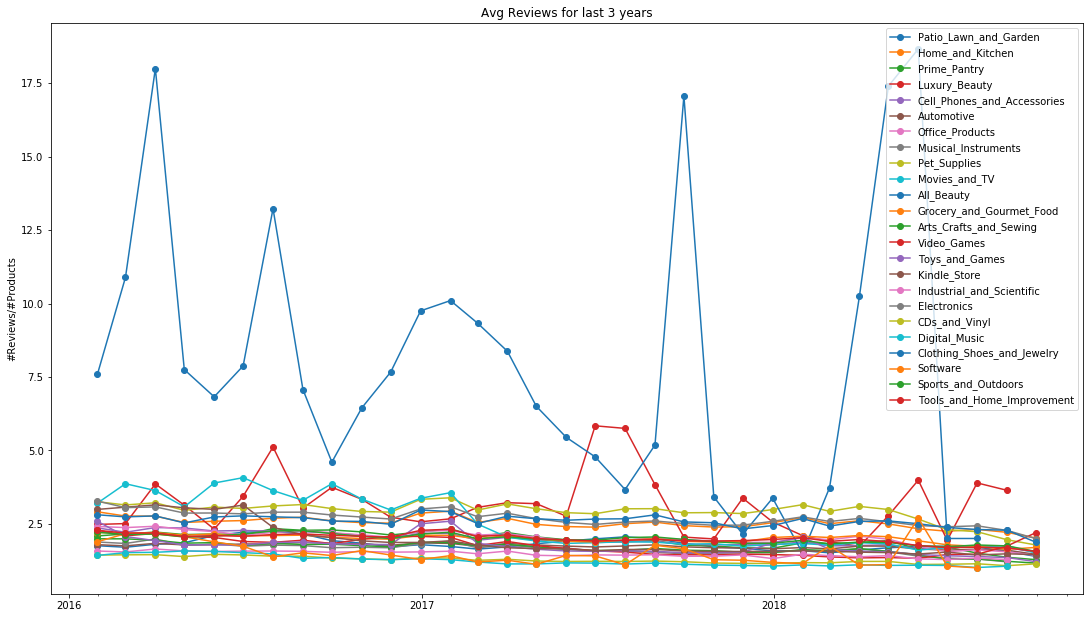

In [17]:
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')

# plt.figure(figsize=(20, 20))
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
for i, department in enumerate(time_count_dictionary):

    count = np.array(time_count_dictionary[department]["Count"])
    product = np.array(time_count_dictionary[department]["Product"])
    date_range = time_count_dictionary[department]["Date"]
    
    ax.plot(date_range, count/product, label=department, marker="o")
    
    # format the ticks
    ax.xaxis.set_major_locator(years)
    ax.xaxis.set_major_formatter(years_fmt)
    ax.xaxis.set_minor_locator(months)
    
    plt.title("Avg Reviews for last 3 years")
    plt.ylabel("#Reviews/#Products")
    plt.legend()

From the plot above, we can see that for most department, the number of reviews remains a constant among the three years we showed, however, there are some departments that have a clear seasonal trend, e.g. **Patio Lawn and Garden**, we can see that in Spring and Fall, the number of reviews have a peak, it's reasonable that those season is good for gardener.